# Finding the Best Markets to Advertise In
_Author: Zeth De Luna &mdash; August 31, 2020_

In this project, we'll use the fundamentals of statistics (distribution summaries using the mean, median, mode, measures of variability, z-scores, etc.) to make business analyses. 

Let's assume that we're working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

## Understanding the Data

To reach our goal, we could organize surveys for a couple of different markets to find out whiich would be the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Since they run [a popular Medium publication](https://medium.freecodecamp.org/), their survey attracted new coders with varying interests (other than web development), which may be useful for our analysis. The survey data is publicly available [here](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
survey_data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=0)

In [3]:
survey_data.shape

(18175, 136)

In [4]:
pd.options.display.max_columns = 140
survey_data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

For the purpose of this analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. More specifically, we'd like to know:
* Where are these new coders located
* What are the locations with the greatest number of new coders
* How much money new coders are willing to spend on learning

Before beginning our analysis, we should check if the sample data that we have is representative for our population of interest. To do this, let's investigate the `JobRoleInterest` column, which describes the roles that each participant would be interested in working.

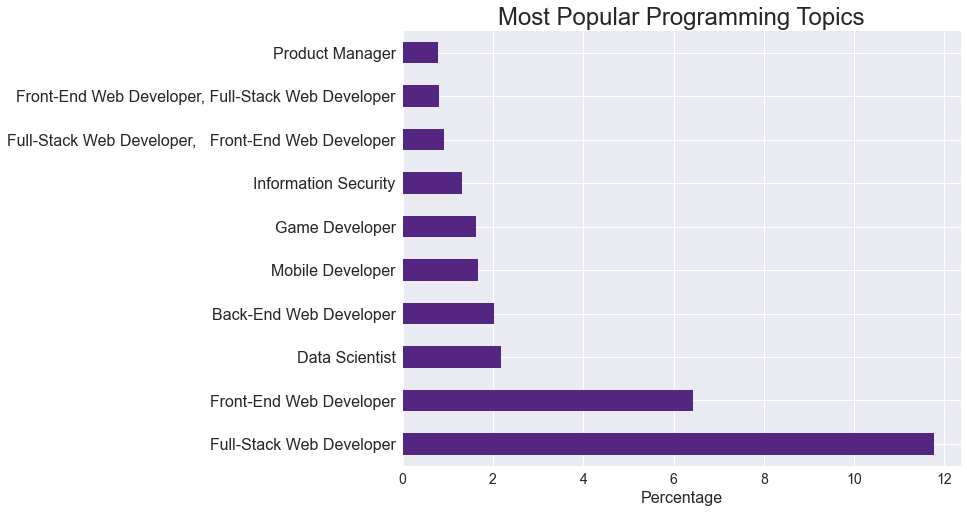

In [5]:
plt.style.use('seaborn')
purple = (85/255, 37/255, 130/255)

((survey_data['JobRoleInterest']
     .value_counts(normalize=True)[:10] * 100)
     .plot.barh(figsize=(10,8), color=purple))

plt.title('Most Popular Programming Topics', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('Percentage', fontsize=16)
plt.show()

Above, we generated a quick bar plot that displays the number of times a job role appeared in the `JobRoleInterest` column and it shows that:
* The most popular job role is related to web development (full-stack, front-end, or back-end)
* Some people are interested in data science
* Some people are interested in mobile development (apps/mobile games)

We should take into account that many of the survey participants are interested in more than one subject. For instance, in the graph above we can see that some people have listed "Full-Stack Web Developer, Front-End Web Developer" in their job interests. Although Full-Stack and Front-End Web Developer is listed as separate jobs, they were not counted when listed together. 

Since we are a platform that offers a wide variety of courses, let's find out how many participants are intersted in only one subject and how many are interested in more than one subject.

In [6]:
# drop null values and split the strings in 'JobRoleInterest'
interests = (survey_data['JobRoleInterest']
                 .copy()
                 .dropna()
                 .str.strip()
                 .str.split(',')
            )

# create frequency table describing how many people had N interests
num_of_interests = interests.apply(lambda jobs: len(jobs))
(num_of_interests
     .value_counts(normalize=True)
     .sort_index()
) * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

We found that only about 32% of the participants were focused on working in one specific programming field, while the rest of the participants had mixed interests. Since we offer courses on a wide variety of subjects, a majority of students having mixed interests might be good for us because we can offer multiple courses to a single student.

However, the main focus of our courses is on web/mobile development. So, let's find out how many people are interested in at least one of these two subjects.

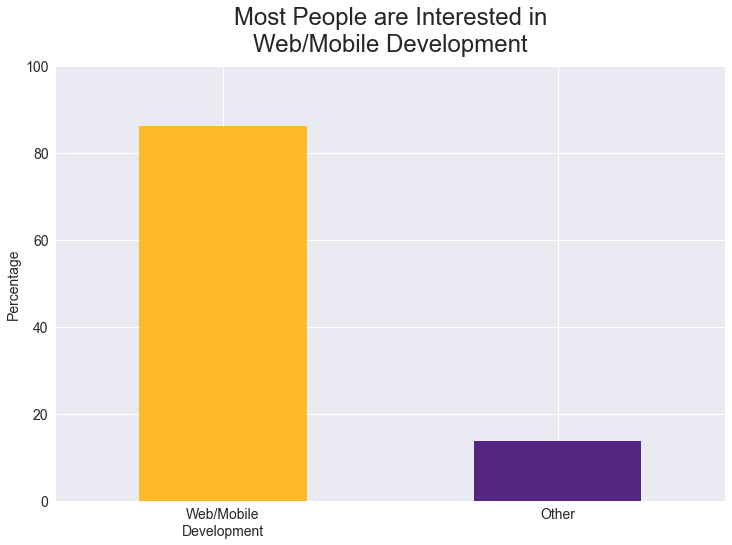

In [7]:
# generate frequency table counting 
# web/mobile development interests vs other interests
developer_or_not = (survey_data['JobRoleInterest']
                       .dropna()
                       .str.contains('Web Developer|Mobile Developer'))
freq = developer_or_not.value_counts(normalize=True) * 100

# plot the frequency table
plt.style.use('seaborn')
colors= [(253/255, 185/255, 39/255), (85/255, 37/255, 130/255)] #Lakers

freq.plot.bar(figsize=(12,8), color=colors)
plt.title('Most People are Interested in\nWeb/Mobile Development',
          y=1.02, fontsize=24)
plt.ylim(0, 100)
plt.ylabel('Percentage', fontsize=14)
plt.xticks([0,1], ['Web/Mobile\nDevelopment', 'Other'], rotation=0,
           fontsize=14)
plt.yticks(fontsize=14)
plt.show()

We have found that most of the participants have listed either Web or Mobile Development as a job interest&mdash;about 85%. Recall that our goal is to promote our product and invest money into advertising towards a market that would bring in the most new students. Since our product is mainly focused on Web and Mobile Development, it is safe to say that this sample is representative for our population of interest.

Now that we know we can use this sample with confidence, let's return to what we want to find:
* Where are these new coders located
* What are the locations with the greatest number of new coders
* How much money new coders are will to spend on learning

## New Coders Locations and Densities
Let's start by answering these questions:
* Where are the new coders located?
* How many coders are there for each location?

To answer these questions, we can use the `CountryCitizen` variable, which describes the country of origin for each participant, and the `CountryLive` variable, which describes which country each participant lives in. Since our goal requires advertising to new coders right now, we'll only need to know where the new coders are currently living. So, for our analysis we'll work with the `CountryLive` variable.

The data we have only provides participant locations at a country level, so we can think of each country as an individual market. Our goal, then, is to find the two best countries to focus our advertising in.

Let's explore the `CountryLive` variable now.

In [8]:
# isolate the participants that answered for 'JobRoleInterest'
answered_JRI = survey_data[survey_data['JobRoleInterest'].notnull()].copy()

# generate a frequency table for CountryLive
countries = answered_JRI['CountryLive'].copy()

freq_countries_abs = (countries
                          .value_counts()
                          .sort_values(ascending=False)
                     )
freq_countries_rel = (countries
                         .value_counts(normalize=True)
                         .sort_values(ascending=False)
                     ) * 100

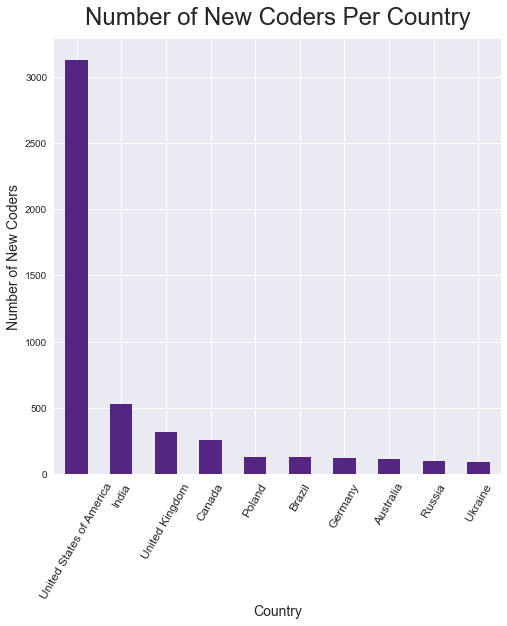

In [9]:
# plot the absolute frequencies
plt.style.use('seaborn')
purple = (85/255, 37/255, 130/255)

freq_countries_abs[:10].plot.bar(figsize=(8,8), color=purple)

plt.title('Number of New Coders Per Country', fontsize=24, y=1.02)
plt.xticks(rotation=60, fontsize=12)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of New Coders', fontsize=14)

plt.show()

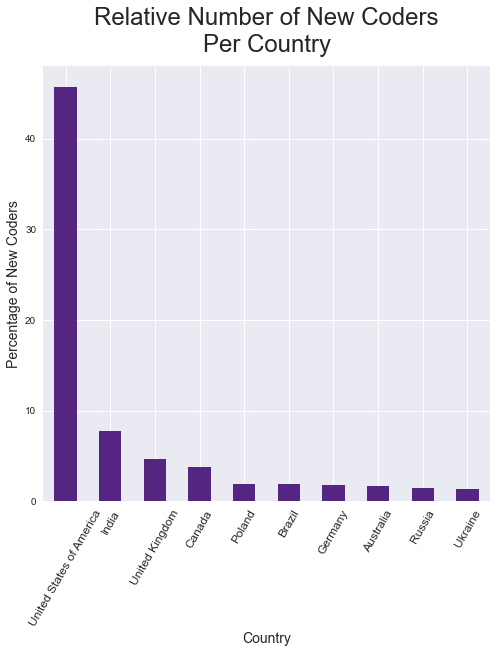

In [10]:
# plot the relative frequencies
plt.style.use('seaborn')
purple = (85/255, 37/255, 130/255)

freq_countries_rel[:10].plot.bar(figsize=(8,8), color=purple)

plt.title('Relative Number of New Coders\nPer Country', fontsize=24, y=1.02)
plt.xticks(rotation=60, fontsize=12)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Percentage of New Coders', fontsize=14)

plt.show()

In [11]:
pd.DataFrame(data={'Absolute Frequency': freq_countries_abs,
                   'Percentage': freq_countries_rel}
            )[:10]

,Absolute Frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


The United States of America has the best potential for return on investments, with about 45.7% of our potential customers being located there. India holds the second best potential, with 7.7% of our customers located there. However, India's numbers are not far off from the United Kingdom (4.6%) and Canada (3.8%).

We now know where the greatest number of new coders are located, however we need to perform some further analysis to find out how much money these new coders are willing to spend on learning. Advertising in areas where students are only willing to learn for free would most likely be unprofitable for our company.

## Who's Willing to Spend?
The `MoneyForLearning` column describes in US dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price at $59 per month, so, we're interested in finding out how much money each student spends per month.

We'll narrow down our analysis to the top four countries: US, India, UK, and Canada. These four countries have the highest frequencies in our sample and English is an official language in these countries, which is important for us since our courses are writen in English.

In [12]:
# create new column that describes the amount of money a student
# has spent per month
answered_JRI['MonthsProgramming'].replace(0, 1, inplace=True)
answered_JRI['MoneyPerMonth'] = round(answered_JRI['MoneyForLearning'] / answered_JRI['MonthsProgramming'],
                                     2)


In [13]:
answered_JRI['MoneyPerMonth'].isnull().sum()

675

In [14]:
# keep rows where MoneyPerMonth and CountryLive is not null
data = answered_JRI[answered_JRI['MoneyPerMonth'].notnull()]
data = data[data['CountryLive'].notnull()]

Now that we know how much each student has spent per month on learning, we want to group the data by country and then measure the average amount of money that students spend per month in each country.

In [15]:
countries_avg_spent = data.groupby('CountryLive').mean()

countries_avg_spent['MoneyPerMonth'][['United States of America',
                                      'India',
                                      'United Kingdom',
                                      'Canada']]

CountryLive
United States of America    227.998023
India                       135.101102
United Kingdom               45.534337
Canada                      113.510958
Name: MoneyPerMonth, dtype: float64

The results show that on average, students living in the US and India spend the most amount of money per month on learning. This is a bit surprising, because if we considered a few socio-economical metrics, we'd intuitively expect people in the UK and Canada to spend more on learning than people in India. 

These results might be caused by a lack of representative data for the UK and Canada, making their means too low. Or, they might be caused by some outliers making the mean for India large. Or, these results might be correct. We'll need to investigate further to find out if the results are correct, or if they are being affected by extreme outliers.

## Handling Extreme Outliers
To visualize outliers in data, we can use boxplots to visualize the distribution of the `MoneyPerMonth` variable for the four countries we're interested in.

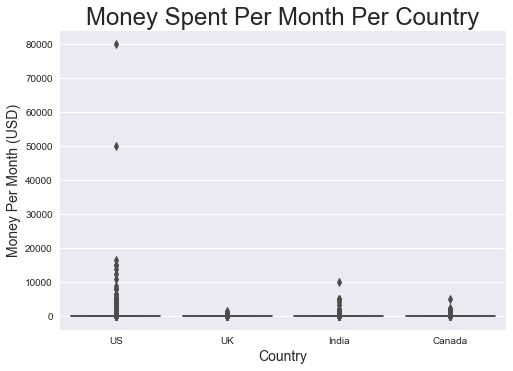

In [16]:
# isolate the 4 desired countries (DC)
top_4 = 'United States of America|India|United Kingdom|Canada'
DC = data[data['CountryLive'].str.contains(top_4)]

sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=DC)
plt.title('Money Spent Per Month Per Country', fontsize=24)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Money Per Month (USD)', fontsize=14)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.rcParams['figure.figsize']=(8,8)

plt.show()

We can't tell from the boxplot if UK, India, or Canada has any bad data, but we can clearly see that two people in the US spend at least \$50,000 a month on learning. It can be done, but it is very unlikely that anyone would spend that much money learning how to code. So, we'll remove those values and observe the boxplot again.

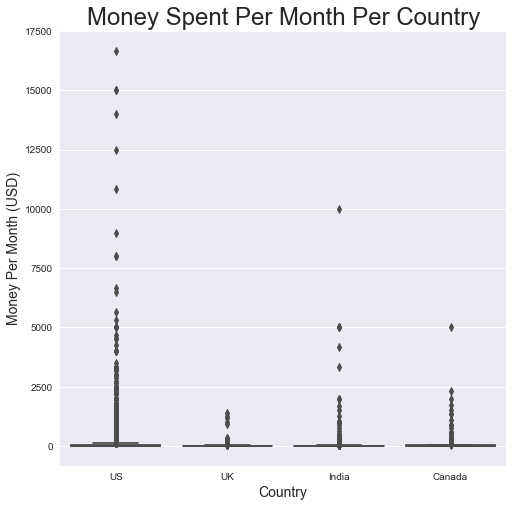

In [17]:
data = data[data['MoneyPerMonth'] < 20000]

top_4 = 'United States of America|India|United Kingdom|Canada'
DC = data[data['CountryLive'].str.contains(top_4)]

sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=DC)
plt.title('Money Spent Per Month Per Country', fontsize=24)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Money Per Month (USD)', fontsize=14)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.rcParams['figure.figsize']=(8,8)

plt.show()

In [18]:
countries_avg_spent = data.groupby('CountryLive').mean()

countries_avg_spent['MoneyPerMonth'][['United States of America',
                                      'India',
                                      'United Kingdom',
                                      'Canada']]

CountryLive
United States of America    183.800136
India                       135.101102
United Kingdom               45.534337
Canada                      113.510958
Name: MoneyPerMonth, dtype: float64

After removing the extreme outliers in `MoneyPerMonth` for the US, the average amount of money spent by students living in the US decreased by about \$50. From the new boxplot, we can see that India has a few extreme outliers and Canada has one extreme outlier.

We don't know if these outliers represent good data or not. If these participants attended bootcamps, which can be very expensive, then it makes sense that they've spent significantly more money than the rest of the participants in that country. Luckily, the data we have tells us if the participant has attended a bootcamp in the `AttendedBootcamp` variable.

In [19]:
data['AttendedBootcamp'].value_counts()

0.0    5839
1.0     339
Name: AttendedBootcamp, dtype: int64

It seems that in the `AttendedBootcamp` column, `0.0` indicates that the participant did not attend a bootcamp and `1.0` indicates that the participant did.

Now let's observe the participants in India.

In [20]:
# inspect extreme outliers from India
india_outliers = DC[(DC['CountryLive'] == 'India') &
                    (DC['MoneyPerMonth'] >= 2500)]
india_outliers.loc[:, ['AttendedBootcamp',
                       'MoneyForLearning',
                       'MonthsProgramming']]

,AttendedBootcamp,MoneyForLearning,MonthsProgramming
1728,0.0,20000.0,4.0
1755,0.0,50000.0,15.0
7989,0.0,5000.0,1.0
8126,0.0,5000.0,1.0
13398,0.0,20000.0,2.0
15587,0.0,100000.0,24.0


Well, none of the outliers have attended a bootcamp. If you take the [survey](https://medium.freecodecamp.com/take-the-2017-new-coder-survey-and-help-us-build-a-massive-public-dataset-8c808cbee7eb), you will find that the question used to fill in the `MoneyForLearning` column was _"Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"_. These participants could have made a mistake and included university tuition in their answer. It looks safe to remove those participants from the data.

In [21]:
# drop India outliers (monthly above $2500)
DC = DC.drop(india_outliers.index)

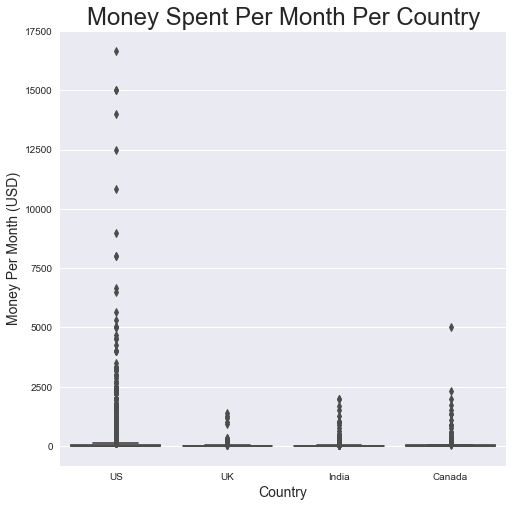

In [22]:
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=DC)
plt.title('Money Spent Per Month Per Country', fontsize=24)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Money Per Month (USD)', fontsize=14)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.rcParams['figure.figsize']=(8,8)

plt.show()

Now, let's take a look at the outlier that we see for Canada that seems to be spending about \$5,000 a month learning to code.

In [23]:
canada_outliers = DC[(DC['CountryLive'] == 'Canada') &
                     (DC['MoneyPerMonth'] >= 2500)]
canada_outliers.loc[:, ['AttendedBootcamp',
                        'MoneyForLearning',
                        'MonthsProgramming']]

,AttendedBootcamp,MoneyForLearning,MonthsProgramming
13659,1.0,10000.0,2.0


We found that this participant has attended a bootcamp, which justifies the large amount of money spent. However, it looks like this person has only been learning for 2 months. Bootcamps typically charge a one-time payment for several months worth of classes. While many bootcamps offer a split monthly payment plan, it is more likely that this participant decided to pay the bootcamp's tuition in full in the beginning of the program, and has spent nothing in the following months. This results in an unrealistic amount of money spent per month, so we'll remove this outlier.

In [24]:
# drop Canada outliers (monthly at around $5000)
DC = DC.drop(canada_outliers.index)

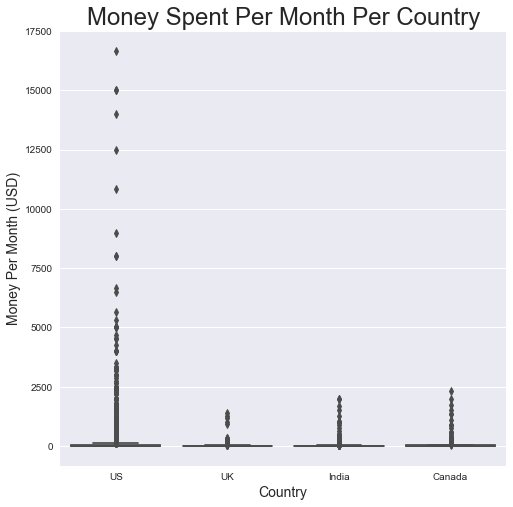

In [25]:
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=DC)
plt.title('Money Spent Per Month Per Country', fontsize=24)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Money Per Month (USD)', fontsize=14)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.rcParams['figure.figsize']=(8,8)

plt.show()

Finally, let's take a look at the outliers for the US (participants who have spend more than \$6,000 a month learning to code).

In [26]:
us_outliers = DC[(DC['CountryLive'] == 'United States of America') &
                 (DC['MoneyPerMonth'] >= 6000)]
us_outliers.loc[:, ['AttendedBootcamp',
                    'MoneyForLearning',
                    'MonthsProgramming',
                    'MoneyPerMonth']]

,AttendedBootcamp,MoneyForLearning,MonthsProgramming,MoneyPerMonth
718,1.0,8000.0,1.0,8000.00
1222,1.0,13000.0,2.0,6500.00
3184,1.0,9000.0,1.0,9000.00
3930,0.0,65000.0,6.0,10833.33
6805,1.0,15000.0,1.0,15000.00
7198,0.0,70000.0,5.0,14000.00
7505,1.0,20000.0,3.0,6666.67
9778,1.0,8000.0,1.0,8000.00
16650,0.0,200000.0,12.0,16666.67
16997,0.0,12500.0,1.0,12500.00


From the 11 US outliers, we see that only 6 of the participants have attended a bootcamp. Of those 6, the most time that a participant has spent programming was 3 months. For the same reasoning we used for Canada's outlier, we can remove these 6 outliers.

For the 5 outliers that did not attend a bootcamp, it's hard to come to a conclusion from the data as to why those participants spent so much money on learning. These 5 hours have been programming for a relatively short amount of time, so we could be seeing the same situation that we discussed for India's outlier. It looks like it would be safe to remove these 5 outliers as well.

In [27]:
# drop US outliers (monthly above $6000)
DC = DC.drop(us_outliers.index)

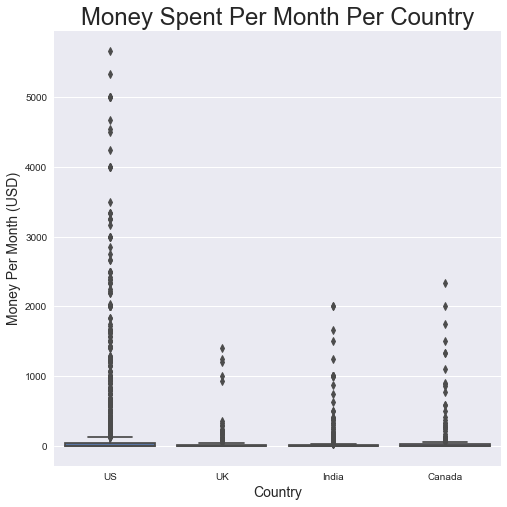

In [28]:
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=DC)
plt.title('Money Spent Per Month Per Country', fontsize=24)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Money Per Month (USD)', fontsize=14)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.rcParams['figure.figsize']=(8,8)

plt.show()

In [29]:
# recalculate the amount of money spent per month per country
DC.groupby('CountryLive').mean()['MoneyPerMonth']

CountryLive
Canada                       93.065397
India                        65.758884
United Kingdom               45.534337
United States of America    142.654634
Name: MoneyPerMonth, dtype: float64

## The Best Two Markets
After removing the extreme outliers, we arrived at the monthly spending on learning per country, shown again below.

In [30]:
DC.groupby('CountryLive').mean()['MoneyPerMonth']

CountryLive
Canada                       93.065397
India                        65.758884
United Kingdom               45.534337
United States of America    142.654634
Name: MoneyPerMonth, dtype: float64

Recall that our website offers subscriptions at the price of \\$59 per month. We found that, on average, students in the US spend about \\$143 per month on learning, making the US a clear choice to advertise in.

Students in the United Kingdom only spend about \\$45 USD per month on learning, so it might be unwise to try to push our website to those customers.

The monthly spending in both Canada and India, however, satisfy our monthly subscription fee. We can only pick one more country to advertise in, so which one is the better choice?

One way we can make a decision is to count how many of our potential customers live in each country (Canada or India). The country with more potential customers will give us a higher chance at gaining new subscribers.

In [35]:
DC['CountryLive'].value_counts()

United States of America    2920
India                        457
United Kingdom               279
Canada                       239
Name: CountryLive, dtype: int64

In [37]:
DC['CountryLive'].value_counts(normalize=True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

From our sample, India has a much larger number of potential customers&mdash;India has almost 2 times as many potential customers as Canada! If we could only choose two countries to advertise in, with one being the US, India might be the better option over Canada.

If we want to support our choice with more evidence, we can consider the following variables in our data:
* `EmploymentStatus`
* `HasDebt`
* `HasFinancialDependents`
* `HasHighSpdInternet`
* `HasHomeMortgage`
* `HasStudentDebt`
* `Income`

These variables may have an effect on subscriptions because they all indicate the participants' financial situation. Someone who is employed financially well-off is more likely able to spend extra money on an online course. On the other hand, someone who is unemployed, or needs to pay off debts, mortgages, and needs the rest of their money to support themselves or their family, will find it more difficult to put money aside for online courses.

## Other Options
It's pretty obvious that we should spend our money advertising in the US, but it's a bit more difficult to decide between Canada and India. We're left here with several options:
1. Instead of limiting ourselves to 2 countries, we could advertise in 3 countries and split our budget based on various factors. Without getting into too much detail, we could split the budget into percentages as such:
    * 75% for US, 15% for India, 10% for Canada
    * 60% for US, 25% for India, 15% for Canada, etc.
2. Stick to the original plan and choose either US and India, or US and Canada. It would still make sense to split the budget. Since we're only splitting between two countries in this case, there would be more money to go around for each country.
3. Since students in the US represent a strong majority of our sample (about 75%) we can focus all of our resources on advertising in the US alone.

At this point, it would be better to hand off our findings to our company's marketing team and let them use their domain knowledge to make the best decision. They may decide to conduct more surveys in India and Canada, and have the data team analyze more data.

## Conclusions
The goal of this analysis was to find the best two markets to advertise in. The data only provided one solid choice: the United States of America. For our second choice, there was no clear advantage between choosing India or Canada. So, we decided to send our results to the company's marketing team so they can use their domain knowledge to make the best decision.